In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics.pairwise import euclidean_distances
from scipy import stats
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn import metrics, cross_validation

C:\Users\ashle\Anaconda2\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
data = pd.read_csv('nyc_census_tracts.csv')
cols='Men Women Hispanic White Black Native Asian Citizen Income IncomePerCap IncomePerCapErr Poverty ChildPoverty Professional Service Office Construction Production Drive Carpool Transit Walk OtherTransp WorkAtHome MeanCommute Employed PrivateWork PublicWork SelfEmployed FamilyWork Unemployment'.split()

In [3]:
data['Hispanic'].fillna(data.groupby('Borough')['Hispanic'].transform('mean'), inplace=True)
data['White'].fillna(data.groupby('Borough')['White'].transform('mean'), inplace=True)
data['Black'].fillna(data.groupby('Borough')['Black'].transform('mean'), inplace=True)
data['Native'].fillna(data.groupby('Borough')['Native'].transform('mean'), inplace=True)
data['Asian'].fillna(data.groupby('Borough')['Asian'].transform('mean'), inplace=True)
data['Income'].fillna(data.groupby('Borough')['Income'].transform('mean'), inplace=True)
data['IncomeErr'].fillna(data.groupby('Borough')['IncomeErr'].transform('mean'), inplace=True)
data['IncomePerCap'].fillna(data.groupby('Borough')['IncomePerCap'].transform('mean'), inplace=True)
data['IncomePerCapErr'].fillna(data.groupby('Borough')['IncomePerCapErr'].transform('mean'), inplace=True)
data['Poverty'].fillna(data.groupby('Borough')['Poverty'].transform('mean'), inplace=True)
data['ChildPoverty'].fillna(data.groupby('Borough')['ChildPoverty'].transform('mean'), inplace=True)
data['Office'].fillna(data.groupby('Borough')['Office'].transform('mean'), inplace=True)
data['Professional'].fillna(data.groupby('Borough')['Professional'].transform('mean'), inplace=True)
data['Service'].fillna(data.groupby('Borough')['Service'].transform('mean'), inplace=True)
data['Construction'].fillna(data.groupby('Borough')['Construction'].transform('mean'), inplace=True)
data['Production'].fillna(data.groupby('Borough')['Hispanic'].transform('mean'), inplace=True)
data['Drive'].fillna(data.groupby('Borough')['Production'].transform('mean'), inplace=True)
data['Carpool'].fillna(data.groupby('Borough')['Carpool'].transform('mean'), inplace=True)
data['Transit'].fillna(data.groupby('Borough')['Transit'].transform('mean'), inplace=True)
data['Walk'].fillna(data.groupby('Borough')['Walk'].transform('mean'), inplace=True)
data['OtherTransp'].fillna(data.groupby('Borough')['OtherTransp'].transform('mean'), inplace=True)
data['WorkAtHome'].fillna(data.groupby('Borough')['WorkAtHome'].transform('mean'), inplace=True)
data['MeanCommute'].fillna(data.groupby('Borough')['MeanCommute'].transform('mean'), inplace=True)
data['PrivateWork'].fillna(data.groupby('Borough')['PrivateWork'].transform('mean'), inplace=True)
data['PublicWork'].fillna(data.groupby('Borough')['PublicWork'].transform('mean'), inplace=True)
data['SelfEmployed'].fillna(data.groupby('Borough')['SelfEmployed'].transform('mean'), inplace=True)
data['FamilyWork'].fillna(data.groupby('Borough')['FamilyWork'].transform('mean'), inplace=True)
data['Unemployment'].fillna(data.groupby('Borough')['Unemployment'].transform('mean'), inplace=True)
data.isnull().sum()

Borough            0
Men                0
Women              0
Hispanic           0
White              0
Black              0
Native             0
Asian              0
Citizen            0
Income             0
IncomeErr          0
IncomePerCap       0
IncomePerCapErr    0
Poverty            0
ChildPoverty       0
Professional       0
Service            0
Office             0
Construction       0
Production         0
Drive              0
Carpool            0
Transit            0
Walk               0
OtherTransp        0
WorkAtHome         0
MeanCommute        0
Employed           0
PrivateWork        0
PublicWork         0
SelfEmployed       0
FamilyWork         0
Unemployment       0
dtype: int64

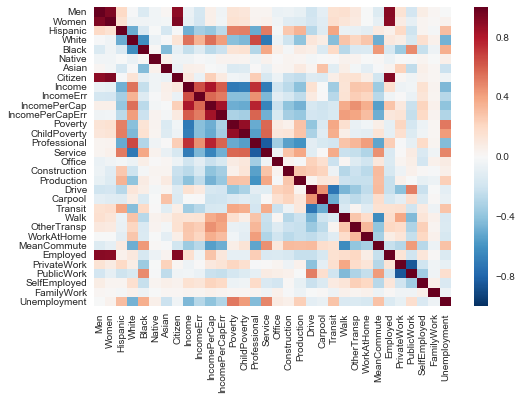

In [4]:
sb.heatmap(data.corr())
plt.show()

In [5]:
def correlation(dataset, threshold):
    col_corr = set() 
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) >= threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
                if colname in dataset.columns:
                    del dataset[colname] 
    return dataset

In [6]:
xall=pd.DataFrame(data, columns=cols)
y=data.Borough
reduced=correlation(xall, 0.75)
a=list(reduced)
print a

['Men', 'Hispanic', 'White', 'Black', 'Native', 'Asian', 'Income', 'Poverty', 'Office', 'Construction', 'Production', 'Drive', 'Carpool', 'Transit', 'Walk', 'OtherTransp', 'WorkAtHome', 'MeanCommute', 'PrivateWork', 'SelfEmployed', 'FamilyWork', 'Unemployment']


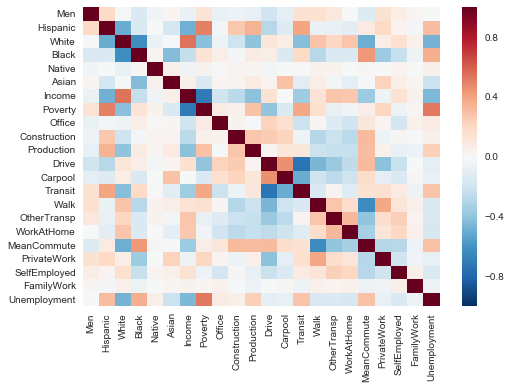

In [7]:
sb.heatmap(reduced.corr())
plt.show()

In [8]:
demcols='Men Women Hispanic White Black Native Asian'.split()
econcols='Income Poverty'.split()
workcols='Office Construction Production Drive Carpool Transit Walk OtherTransp WorkAtHome MeanCommute PrivateWork SelfEmployed FamilyWork Unemployment'.split()
demworkcols='Men Women Hispanic White Black Native Asian Office Construction Production Drive Carpool Transit Walk OtherTransp WorkAtHome MeanCommute PrivateWork SelfEmployed FamilyWork Unemployment'.split()
demeconcols='Men Women Hispanic White Black Native Asian Income Poverty'.split()
econworkcols='Income Poverty Office Construction Production Drive Carpool Transit Walk OtherTransp WorkAtHome MeanCommute PrivateWork SelfEmployed FamilyWork Unemployment'.split()

In [9]:
xall=pd.DataFrame(data, columns=cols)
y=data.Borough
alltrainData, alltestData, alltrainLabels, alltestLabels = train_test_split(xall, y, test_size=0.2)

xreduced=pd.DataFrame(data,columns=reduced)
y=data.Borough
reducedtrainData, reducedtestData, reducedtrainLabels, reducedtestLabels = train_test_split(reduced, y, test_size=0.2)

xdem=pd.DataFrame(data, columns=demcols)
demtrainData, demtestData, demtrainLabels, demtestLabels = train_test_split(xdem, y, test_size=0.2)

xecon=pd.DataFrame(data, columns=econcols)
econtrainData, econtestData, econtrainLabels, econtestLabels = train_test_split(xecon, y, test_size=0.2)

xwork=pd.DataFrame(data, columns=workcols)
worktrainData, worktestData, worktrainLabels, worktestLabels = train_test_split(xwork, y, test_size=0.2)

xdemecon=pd.DataFrame(data, columns=demeconcols)
demecontrainData, demecontestData, demecontrainLabels, demecontestLabels = train_test_split(xdemecon, y, test_size=0.2)

xdemwork=pd.DataFrame(data, columns=demworkcols)
demworktrainData, demworktestData, demworktrainLabels, demworktestLabels = train_test_split(xdemwork, y, test_size=0.2)

xeconwork=pd.DataFrame(data, columns=econworkcols)
econworktrainData, econworktestData, econworktrainLabels, econworktestLabels = train_test_split(xeconwork, y, test_size=0.2)


In [10]:
print 'ALL'
bernoulli = BernoulliNB()
predicted = cross_validation.cross_val_predict(bernoulli, alltrainData, alltrainLabels, cv=10)
print 'Bernulli NB: '+str(metrics.accuracy_score(alltrainLabels, predicted))

multi = MultinomialNB()
predicted = cross_validation.cross_val_predict(multi, alltrainData, alltrainLabels, cv=10)
print 'Multi NB: '+str(metrics.accuracy_score(alltrainLabels, predicted))

gaussian = GaussianNB()
predicted = cross_validation.cross_val_predict(gaussian, alltrainData, alltrainLabels, cv=10)
print 'Gaussian NB: '+str(metrics.accuracy_score(alltrainLabels, predicted))


print '******************************************************'

print 'REDUCED'
bernoulli = BernoulliNB()
predicted = cross_validation.cross_val_predict(bernoulli, reducedtrainData, reducedtrainLabels, cv=10)
print 'Bernulli NB: '+str(metrics.accuracy_score(reducedtrainLabels, predicted))

multi = MultinomialNB()
predicted = cross_validation.cross_val_predict(multi, reducedtrainData, reducedtrainLabels, cv=10)
print 'Multi NB: '+str(metrics.accuracy_score(reducedtrainLabels, predicted))

gaussian = GaussianNB()
predicted = cross_validation.cross_val_predict(gaussian,reducedtrainData, reducedtrainLabels, cv=10)
print 'Gaussian NB: '+str(metrics.accuracy_score(reducedtrainLabels, predicted))


print '******************************************************'

print 'DEMOGRAPHIC'
bernoulli = BernoulliNB()
predicted = cross_validation.cross_val_predict(bernoulli, demtrainData,demtrainLabels, cv=10)
print 'Bernulli NB: '+str(metrics.accuracy_score(demtrainLabels, predicted))

multi = MultinomialNB()
predicted = cross_validation.cross_val_predict(multi, demtrainData,demtrainLabels, cv=10)
print 'Multi NB: '+str(metrics.accuracy_score(demtrainLabels, predicted))

gaussian = GaussianNB()
predicted = cross_validation.cross_val_predict(gaussian, demtrainData,demtrainLabels,cv=10)
print 'Gaussian NB: '+str(metrics.accuracy_score(demtrainLabels, predicted))


print '******************************************************'

print 'ECONOMIC'
bernoulli = BernoulliNB()
predicted = cross_validation.cross_val_predict(bernoulli, econtrainData, econtrainLabels, cv=10)
print 'Bernulli NB: '+str(metrics.accuracy_score(econtrainLabels, predicted))

multi = MultinomialNB()
predicted = cross_validation.cross_val_predict(multi, econtrainData, econtrainLabels, cv=10)
print 'Multi NB: '+str(metrics.accuracy_score(econtrainLabels, predicted))

gaussian = GaussianNB()
predicted = cross_validation.cross_val_predict(gaussian,econtrainData, econtrainLabels,cv=10)
print 'Gaussian NB: '+str(metrics.accuracy_score(econtrainLabels, predicted))


print '******************************************************'

print 'WORK'
bernoulli = BernoulliNB()
predicted = cross_validation.cross_val_predict(bernoulli, worktrainData,worktrainLabels, cv=10)
print 'Bernulli NB: '+str(metrics.accuracy_score(worktrainLabels, predicted))

multi = MultinomialNB()
predicted = cross_validation.cross_val_predict(multi, worktrainData,worktrainLabels, cv=10)
print 'Multi NB: '+str(metrics.accuracy_score(worktrainLabels, predicted))

gaussian = GaussianNB()
predicted = cross_validation.cross_val_predict(gaussian, worktrainData,worktrainLabels, cv=10)
print 'Gaussian NB: '+str(metrics.accuracy_score(worktrainLabels, predicted))


print '******************************************************'
print 'ECON + WORK'
bernoulli = BernoulliNB()
predicted = cross_validation.cross_val_predict(bernoulli, econworktrainData,econworktrainLabels,cv=10)
print 'Bernulli NB: '+str(metrics.accuracy_score(econworktrainLabels, predicted))

multi = MultinomialNB()
predicted = cross_validation.cross_val_predict(multi, econworktrainData,econworktrainLabels, cv=10)
print 'Multi NB: '+str(metrics.accuracy_score(econworktrainLabels, predicted))

gaussian = GaussianNB()
predicted = cross_validation.cross_val_predict(gaussian, econworktrainData,econworktrainLabels, cv=10)
print 'Gaussian NB: '+str(metrics.accuracy_score(econworktrainLabels, predicted))


print '******************************************************'

print 'DEMOGRAPHIC + ECON'
bernoulli = BernoulliNB()
predicted = cross_validation.cross_val_predict(bernoulli, demecontrainData,demecontrainLabels, cv=10)
print 'Bernulli NB: '+str(metrics.accuracy_score(demecontrainLabels, predicted))

multi = MultinomialNB()
predicted = cross_validation.cross_val_predict(multi, demecontrainData,demecontrainLabels, cv=10)
print 'Multi NB: '+str(metrics.accuracy_score(demecontrainLabels, predicted))

gaussian = GaussianNB()
predicted = cross_validation.cross_val_predict(gaussian,  demecontrainData,demecontrainLabels, cv=10)
print 'Gaussian NB: '+str(metrics.accuracy_score(demecontrainLabels, predicted))


print '******************************************************'

print 'DEMOGRAPHIC + WORK'
bernoulli = BernoulliNB()
predicted = cross_validation.cross_val_predict(bernoulli, demworktrainData,demworktrainLabels, cv=10)
print 'Bernulli NB: '+str(metrics.accuracy_score(demworktrainLabels, predicted))

multi = MultinomialNB()
predicted = cross_validation.cross_val_predict(multi, demworktrainData,demworktrainLabels, cv=10)
print 'Multi NB: '+str(metrics.accuracy_score(demworktrainLabels, predicted))

gaussian = GaussianNB()
predicted = cross_validation.cross_val_predict(gaussian,  demworktrainData,demworktrainLabels, cv=10)
print 'Gaussian NB: '+str(metrics.accuracy_score(demworktrainLabels, predicted))


ALL
Bernulli NB: 0.412002308136
Multi NB: 0.430467397576
Gaussian NB: 0.590305828044
******************************************************
REDUCED
Bernulli NB: 0.412579342181
Multi NB: 0.421811886901
Gaussian NB: 0.597230236584
******************************************************
DEMOGRAPHIC
Bernulli NB: 0.34448932487
Multi NB: 0.417195614541
Gaussian NB: 0.461050201962
******************************************************
ECONOMIC
Bernulli NB: 0.34679746105
Multi NB: 0.376803231391
Gaussian NB: 0.473744950952
******************************************************
WORK
Bernulli NB: 0.398153491056
Multi NB: 0.467397576457
Gaussian NB: 0.498557414887
******************************************************
ECON + WORK
Bernulli NB: 0.404500865551
Multi NB: 0.429890363531
Gaussian NB: 0.507789959608
******************************************************
DEMOGRAPHIC + ECON
Bernulli NB: 0.338141950375
Multi NB: 0.338141950375
Gaussian NB: 0.536641661858
************************************

In [11]:
logreg.fit(reducedtrainData, reducedtrainLabels)
votes=logreg.predict(reducedtestData)
print 'Testing accuracy = '+ str(metrics.accuracy_score(reducedtestLabels, votes))
print 
for i in range(0,5):
    print 'The feature with the highest paramater in '+ labels[i] + ' is '+ a[np.argmax(logreg.coef_[i])] + ' with a value of ' + str(np.amax(logreg.coef_[i]))
    print 'The feature with the lowest paramater in '+ labels[i] + ' is '+ a[np.argmin(logreg.coef_[i])] + ' with a value of ' + str(np.amin(logreg.coef_[i]))
    print 

NameError: name 'logreg' is not defined

In [ ]:
data.groupby("Borough").Asian.plot(kind='kde', legend=True)
plt.title('% Asian ')
plt.show()
data.groupby("Borough").Hispanic.plot(kind='kde', legend=True)
plt.title('% Hispanic')
plt.show()

data.groupby("Borough").Construction.plot(kind='kde', legend=True)
plt.title('% Construction')
plt.show()
data.groupby("Borough").PrivateWork.plot(kind='kde', legend=True)
plt.title('% Private Work')
plt.show()

data.groupby("Borough").Walk.plot(kind='kde', legend=True)
plt.title('% Walk')
plt.show()
data.groupby("Borough").Drive.plot(kind='kde', legend=True)
plt.title('% Drive')
plt.show()

data.groupby("Borough").SelfEmployed.plot(kind='kde', legend=True)
plt.title('% Self Employeed')
plt.show()
data.groupby("Borough").Poverty.plot(kind='kde', legend=True)
plt.title('% Poverty')
plt.show()


In [ ]:
labels=['Bronx','Brooklyn','Manhattan','Queens','Staten Island']
cm=confusion_matrix(reducedtestLabels, votes, labels=labels)
df_cm=pd.DataFrame(cm, index = [i for i in labels], columns = [i for i in labels])
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True)
plt.show()

In [ ]:
for i in range(0,5): 
    truepercent=float(cm[i][i])/float(cm[i].sum())
    print labels[i] +' is correctly classified '+ str(truepercent*100)+' percent of the time.'